# Paired Sample T-test : 전후 차이 비교

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc

In [3]:
font_location = "C:/Windows/Fonts/NanumBarunGothic.ttf"

In [4]:
font_name = font_manager.FontProperties(fname=font_location).get_name()
print(font_name)

NanumBarunGothic


In [5]:
rc('font', family="NanumBarunGothic")

## 전후 차이 비교를 위한 샘플데이터(2018년 생생정보통, 수요미식회, 맛있는녀석들) 전처리

In [6]:
df = pd.read_csv('raw_data/2017_tidy2.csv')

In [7]:
df.head()

,방송,식당,방영일,포스팅일,제목,주소,days_diff,지역
0,생생,대풍만두,2017-01-03,2017-01-08,안동 사대부찜닭 생생정보통에 나온 <mark>대풍만두</mark> 다녀왔어요,"https://m.blog.naver.com/hts1222/220905835536""",5,안동
1,생생,대풍만두,2017-01-03,2017-01-27,"안동구시장찐빵맛집, 생생정보통 <mark>대풍만두</mark>","https://m.blog.naver.com/pinkwona/220920892215""",24,안동
2,생생,대풍만두,2017-01-03,2016-12-20,"안동시 서부동 만두맛집, <mark>대풍만두</mark>","http://siksamenu.tistory.com/2212""",-14,안동
3,생생,대풍만두,2017-01-03,2017-01-03,오즈패밀리 KBS 생생정보 1월3일 맛집 - 흑미 복분자 찐빵(<mark>대풍만두<...,"https://m.blog.naver.com/flypig1/220901684323""",0,안동
4,생생,대풍만두,2017-01-03,2017-01-03,"◈ 안동 찐빵 만두 맛집 공유~* , 2tv 저녁 생생정보 안동 구시장 찐빵 맛집 ...","https://m.blog.naver.com/mediost/220901827867""",0,안동


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44179 entries, 0 to 44178
Data columns (total 8 columns):
방송           44179 non-null object
식당           44179 non-null object
방영일          44179 non-null object
포스팅일         44179 non-null object
제목           44179 non-null object
주소           44179 non-null object
days_diff    44179 non-null int64
지역           43952 non-null object
dtypes: int64(1), object(7)
memory usage: 2.7+ MB


In [8]:
df['방영전'] = df['days_diff'] < 0
df['방영후'] = df['days_diff'] > 0
df['방송당일'] = df['days_diff'] == 0

df['방영전'] = df['방영전'].astype(int)
df['방영후'] = df['방영후'].astype(int)
df['방송당일'] = df['방송당일'].astype(int)
df.head()

,방송,식당,방영일,포스팅일,제목,주소,days_diff,지역,방영전,방영후,방송당일
0,생생,대풍만두,2017-01-03,2017-01-08,안동 사대부찜닭 생생정보통에 나온 <mark>대풍만두</mark> 다녀왔어요,"https://m.blog.naver.com/hts1222/220905835536""",5,안동,0,1,0
1,생생,대풍만두,2017-01-03,2017-01-27,"안동구시장찐빵맛집, 생생정보통 <mark>대풍만두</mark>","https://m.blog.naver.com/pinkwona/220920892215""",24,안동,0,1,0
2,생생,대풍만두,2017-01-03,2016-12-20,"안동시 서부동 만두맛집, <mark>대풍만두</mark>","http://siksamenu.tistory.com/2212""",-14,안동,1,0,0
3,생생,대풍만두,2017-01-03,2017-01-03,오즈패밀리 KBS 생생정보 1월3일 맛집 - 흑미 복분자 찐빵(<mark>대풍만두<...,"https://m.blog.naver.com/flypig1/220901684323""",0,안동,0,0,1
4,생생,대풍만두,2017-01-03,2017-01-03,"◈ 안동 찐빵 만두 맛집 공유~* , 2tv 저녁 생생정보 안동 구시장 찐빵 맛집 ...","https://m.blog.naver.com/mediost/220901827867""",0,안동,0,0,1


In [30]:
df.loc[df['식당'] == '메이탄']

,방송,식당,방영일,포스팅일,제목,주소,days_diff,지역,방영전,방영후,방송당일
40927,맛있는녀석들,메이탄,2017-10-13,2017-12-05,주말 외식 중식 코스요리 <mark>메이탄</mark> 에서,https://m.blog.naver.com/dukilove0314/22115627...,53,시청/서초/강남/신당/왕십리/신논현/중구/상계/서대문/천안/노원/상계/마포/공덕/선...,0,1,0
40928,맛있는녀석들,메이탄,2017-10-13,2017-12-08,강남역 10번출구 맛집 : 중식당 '<mark>메이탄</mark>' 강추!,https://m.blog.naver.com/tastytravel/221158644...,56,시청/서초/강남/신당/왕십리/신논현/중구/상계/서대문/천안/노원/상계/마포/공덕/선...,0,1,0
40929,맛있는녀석들,메이탄,2017-10-13,2017-11-18,상계동 맛집 # 당고개 맛집 <mark>메이탄</mark>에서 깔끔하게 식사!,"https://m.blog.naver.com/foodin0129/221143162441""",36,시청/서초/강남/신당/왕십리/신논현/중구/상계/서대문/천안/노원/상계/마포/공덕/선...,0,1,0
40930,맛있는녀석들,메이탄,2017-10-13,2018-01-04,화곡 맛집/ <mark>메이탄</mark> 강서점,"https://m.blog.naver.com/rolo_ggo/221177486897""",83,시청/서초/강남/신당/왕십리/신논현/중구/상계/서대문/천안/노원/상계/마포/공덕/선...,0,1,0
40931,맛있는녀석들,메이탄,2017-10-13,2017-12-05,선유도공원 맛집 <mark>메이탄</mark> 세련된 중식요리,"https://m.blog.naver.com/uchihehe/221155807688""",53,시청/서초/강남/신당/왕십리/신논현/중구/상계/서대문/천안/노원/상계/마포/공덕/선...,0,1,0
40932,맛있는녀석들,메이탄,2017-10-13,2017-11-21,서초동 맛집 중식이 맛있는 집 <mark>메이탄</mark>,"https://m.blog.naver.com/llillo2/221144557483""",39,시청/서초/강남/신당/왕십리/신논현/중구/상계/서대문/천안/노원/상계/마포/공덕/선...,0,1,0
40933,맛있는녀석들,메이탄,2017-10-13,2017-12-21,[상계동 맛집] <mark>메이탄</mark> 상계점에서 맛있는 중식 코스 즐기기 :),"https://m.blog.naver.com/dlrhdmssla/221167850538""",69,시청/서초/강남/신당/왕십리/신논현/중구/상계/서대문/천안/노원/상계/마포/공덕/선...,0,1,0
40934,맛있는녀석들,메이탄,2017-10-13,2017-09-14,"당산역 맛집, <mark>메이탄</mark>에서 저녁식사 하던 날","https://m.blog.naver.com/mitsru79/221097096587""",-29,시청/서초/강남/신당/왕십리/신논현/중구/상계/서대문/천안/노원/상계/마포/공덕/선...,1,0,0
40935,맛있는녀석들,메이탄,2017-10-13,2017-11-06,노원구 맛집 <mark>메이탄</mark> 중식 노원역 맛집 인정,"https://m.blog.naver.com/ghqkd0829/221133746347""",24,시청/서초/강남/신당/왕십리/신논현/중구/상계/서대문/천안/노원/상계/마포/공덕/선...,0,1,0
40936,맛있는녀석들,메이탄,2017-10-13,2018-01-09,쌍용동 맛집 :: 천안 중식당 <mark>메이탄</mark> 양장피 애정♥,"https://m.blog.naver.com/kneknekne/221180926463""",88,시청/서초/강남/신당/왕십리/신논현/중구/상계/서대문/천안/노원/상계/마포/공덕/선...,0,1,0


In [32]:
df.loc[df['식당'] == '무등산']

,방송,식당,방영일,포스팅일,제목,주소,days_diff,지역,방영전,방영후,방송당일
27629,맛있는녀석들,무등산,2017-03-17,2017-06-14,6월 가볼만한곳 화순 <mark>무등산</mark> 편백 자연휴양림,"https://m.blog.naver.com/namdokorea/221029250348""",89,청담,0,1,0
27630,맛있는녀석들,무등산,2017-03-17,2017-03-08,[광주가볼만한곳]미술관이 <mark>무등산</mark>국립공원 안에 있다(의재미술관),"http://decemberrose71.tistory.com/735""",-9,청담,1,0,0
27631,맛있는녀석들,무등산,2017-03-17,2017-02-05,('17.2.4) 동시성 - 광주 <mark>무등산</mark>의 정기,"https://m.blog.naver.com/speer226/220927750699""",-40,청담,1,0,0
27632,맛있는녀석들,무등산,2017-03-17,2017-04-18,"<mark>무등산</mark> 근처, 담양 한정식집 수려재","https://m.blog.naver.com/anyes88/220985865749""",32,청담,0,1,0
27633,맛있는녀석들,무등산,2017-03-17,2017-03-27,"청담동 맛집 - 맛있는 녀석들 ' 육회 비빔밥' 편, <mark>무등산</mark>","https://m.blog.naver.com/mickyrella/220968250862""",10,청담,0,1,0
27634,맛있는녀석들,무등산,2017-03-17,2017-05-30,주말 나들이 : 광주 <mark>무등산</mark> 증심사,"https://m.blog.naver.com/kam96/221017381441""",74,청담,0,1,0
27635,맛있는녀석들,무등산,2017-03-17,2017-06-13,<mark>무등산</mark>풍경소리 145회 '다시 만날 날이 있겠죠',"https://m.blog.naver.com/choim1/221028402545""",88,청담,0,1,0
27636,맛있는녀석들,무등산,2017-03-17,2017-02-26,"[청담 맛집] 학동 사거리의 터줏대감, <mark>무등산</mark>","https://m.blog.naver.com/thayers/220945131268""",-19,청담,1,0,0
27637,맛있는녀석들,무등산,2017-03-17,2017-05-29,<mark>무등산</mark> 규봉암을 오르다!,"https://m.blog.naver.com/kes731119/221016641538""",73,청담,0,1,0
27638,맛있는녀석들,무등산,2017-03-17,2017-05-06,"광주 맛집/ <mark>무등산</mark> 동원게장, 화순근처 꽃피는춘삼월","https://m.blog.naver.com/hoya0758/220999569310""",50,청담,0,1,0


In [9]:
paired = pd.DataFrame(df.groupby('식당')['방영전', '방영후', '방송당일'].sum()).reset_index()

In [10]:
paired

,식당,방영전,방영후,방송당일
0,136생고기,4,31,14
1,갈비구락부,36,22,24
2,갓포치유,24,65,9
3,강릉감자옹심이,177,278,17
4,강릉아구찜,9,20,23
5,강촌 숯불 닭갈비,42,113,25
6,강촌원조쭈꾸미,7,43,3
7,강화해신탕,12,17,24
8,개미집,13,20,0
9,개화옥,21,54,18


In [11]:
paired.loc[paired['방영전']-paired['방영후'] > 0]

,식당,방영전,방영후,방송당일
1,갈비구락부,36,22,24
15,계림식당,37,30,19
24,그릭슈바인,76,57,3
57,도마,16,14,0
61,동명항게찜,173,159,8
63,두메향기 산,106,59,1
72,류재은베이커리,246,219,7
80,메이탄,504,488,8
102,번개맞은흑돼지,32,27,20
113,사돈집,103,59,7


In [12]:
paired[['방영전','방영후', '방송당일']].describe()

,방영전,방영후,방송당일
count,246.000000,246.000000,246.000000
mean,32.634146,59.040650,12.386179
std,58.942693,75.692277,9.578103
min,0.000000,0.000000,0.000000
25%,5.000000,17.000000,3.000000
50%,13.000000,35.000000,12.500000
75%,32.000000,72.250000,20.000000
max,504.000000,558.000000,43.000000


**평균값을 보았을 때, 방영전후 차이가 있음**

### outlier 확인

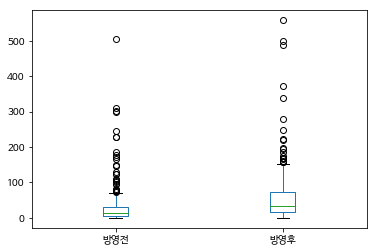

In [13]:
paired[['방영전', '방영후']].plot(kind='box')
# This saves the plot as a png file
plt.savefig('paired_t-test_tidy_boxplot_outliers.png')

outlier 처리

In [16]:
paired1 = paired.loc[(paired['방영전']<120)&(paired['방영후']<120)]

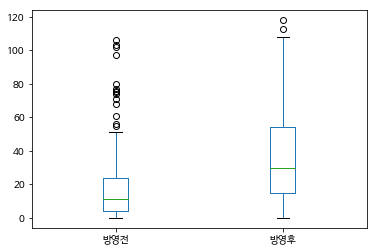

In [17]:
paired1[['방영전', '방영후']].plot(kind='box')

In [19]:
paired1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 245
Data columns (total 3 columns):
식당     197 non-null object
방영전    197 non-null int32
방영후    197 non-null int32
dtypes: int32(2), object(1)
memory usage: 4.6+ KB


### 정규성 검정

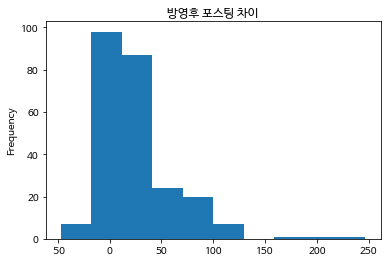

In [18]:
paired['post_diff'] = paired['방영후'] - paired['방영전']

paired['post_diff'].plot(kind='hist', title= '방영후 포스팅 차이')

Text(0.5,1,'Posting Difference Q-Q Plot')

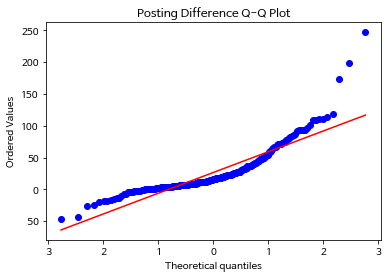

In [19]:
stats.probplot(paired['post_diff'], plot= plt)
plt.title('Posting Difference Q-Q Plot')

In [22]:
stats.shapiro(paired['post_diff'])

(0.835550844669342, 1.91461336869936e-15)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


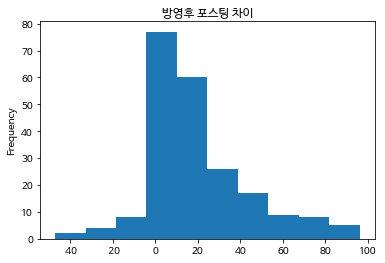

In [20]:
paired1['post_diff'] = paired1['방영후'] - paired1['방영전']

paired1['post_diff'].plot(kind='hist', title= '방영후 포스팅 차이')


(0.9150761961936951, 8.719390209854794e-10)

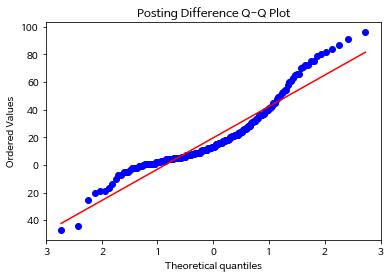

In [21]:
stats.probplot(paired1['post_diff'], plot= plt)
plt.title('Posting Difference Q-Q Plot')

stats.shapiro(paired1['post_diff'])

**정규성은 만족 안하지만 데이터가 많으므로(>30) 일단 정규성을 가정하고 넘어가자..**

## Paired sample t-test

In [22]:
stats.ttest_rel(paired['방영전'], paired['방영후'])

Ttest_relResult(statistic=-11.515287727603477, pvalue=8.262886784611906e-25)

In [23]:
stats.ttest_rel(paired1['방영전'], paired1['방영후'])

Ttest_relResult(statistic=-12.229219299465244, pvalue=1.8776952430783703e-26)

**pvalue < 0.05이므로 맛집 프로그램 방영전과 방영후 포스팅 차이가 있다고 말할 수 있음**